# Final Project

You have made it to the end of the course.
In the labs, you saw a couple simplified examples of constructing data stories.

For the final project, you will 
 1. find some data, 
 2. upload it to JupyterHub
 3. construct a data story

---

## Step 0: Choose your Language for this Adventure:

You can do this project in either *R* or *Python*.

To change the kernel of this notebook, do the following with the `Kernel` menu.

 * `Kernel > Change Kernel > Python 3`
 * `Kernel > Change Kernel > R`

![FP_Change_Kernel.png MISSING](../images/FP_Change_Kernel.png)


---
## Step 1: Find a Story

Think back to any of the data files we have used in this class. 
Alternatively, you can search online for potential data and story ideas.

In the cell below, please detail the source of your data (with link).
Additionally, preview your story you hope to uncover.

## Step 2: Remember your Audience

In the cell below, describe your audience!
 * Who will the audience be?
 * What value will they derive from your story?

## Step 3: Find and Stage Your Data

If you data is from another source, such as Kaggle, you must download it to your local computer, then upload the data to JuptyerHub.

#### If you are uploading files:
 * Use folder navigation of your first JupyterTab to get to course's `/modules/module8/exercises/` folder.
![FP_Folder_Navigation.png MISSING](../images/FP_Folder_Navigation.png)
 * Click the Upload Button and Choose File(s)
![FP_Upload_Button.png MISSING](../images/FP_Upload_Button.png)
 * Activate the upload
![FP_UploadFile_2.png MISSING](../images/FP_UploadFile_2.png)
 

### In the cell below, please list the name of the file that is now accessible on the JupyterHub environment.

**Note**: 
If you uploaded a file to your `module8/exercises` folder, the file name is all you need to load it into the a data frame in the usual manner.
If you are using a file from another module of the course, you should be able to copy the full pathname and use it as is in this notebook.

## Step 4: Vet Data Sources

Use the cells below to load the data, inspect it, and perform some exploratory data analysis.  

Add more cells (`Insert > Insert Cell Below`) if you want additional cells.

In [152]:
library(dplyr)
library(ggplot2)
library(tidyr)
library(lubridate)

mydata <- read.csv('Meteorite_Landings_NASA.csv', header=TRUE, stringsAsFactors=FALSE)

In [153]:
head(mydata)

name,id,nametype,recclass,mass..g.,fall,year,reclat,reclong,GeoLocation
<chr>,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>
Aachen,1,Valid,L5,21,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)"
Aarhus,2,Valid,H6,720,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.18333, 10.23333)"
Abee,6,Valid,EH4,107000,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.21667, -113.0)"
Acapulco,10,Valid,Acapulcoite,1914,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.88333, -99.9)"
Achiras,370,Valid,L6,780,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.16667, -64.95)"
Adhi Kot,379,Valid,EH4,4239,Fell,01/01/1919 12:00:00 AM,32.10000,71.80000,"(32.1, 71.8)"


In [154]:
#Ensure the year column is a date and separate the date / time attributes

mydata$date <- as.Date(mydata$year)

myData <- mydata %>%
separate(year, into = c("date", "time"), sep = " ")

head(myData)

#note: will need to remvoe N/A values

Warning message:
“Expected 2 pieces. Additional pieces discarded in 45425 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 291 rows [38, 1938, 3432, 3463, 5009, 5081, 5305, 5362, 5491, 5517, 5701, 5702, 7077, 7544, 7545, 7547, 7548, 7549, 7550, 7551, ...].”

name,id,nametype,recclass,mass..g.,fall,date,time,reclat,reclong,GeoLocation
<chr>,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
Aachen,1,Valid,L5,21,Fell,01/01/1880,12:00:00,50.77500,6.08333,"(50.775, 6.08333)"
Aarhus,2,Valid,H6,720,Fell,01/01/1951,12:00:00,56.18333,10.23333,"(56.18333, 10.23333)"
Abee,6,Valid,EH4,107000,Fell,01/01/1952,12:00:00,54.21667,-113.00000,"(54.21667, -113.0)"
Acapulco,10,Valid,Acapulcoite,1914,Fell,01/01/1976,12:00:00,16.88333,-99.90000,"(16.88333, -99.9)"
Achiras,370,Valid,L6,780,Fell,01/01/1902,12:00:00,-33.16667,-64.95000,"(-33.16667, -64.95)"
Adhi Kot,379,Valid,EH4,4239,Fell,01/01/1919,12:00:00,32.10000,71.80000,"(32.1, 71.8)"


In [155]:
#Subset the data and remove columns, ensure date column is in date format for year only
myData <- subset(myData, select=-c(nametype,reclat,reclong,GeoLocation,time))
myData$date <- format(as.Date(myData$date, format="%d/%m/%Y"), "%Y")

#omit N/A values
myData <- na.omit(myData)

In [156]:
summary(myData)

     name                 id          recclass            mass..g.       
 Length:45305       Min.   :    1   Length:45305       Min.   :       0  
 Class :character   1st Qu.:12651   Class :character   1st Qu.:       7  
 Mode  :character   Median :24168   Mode  :character   Median :      32  
                    Mean   :26807                      Mean   :   12208  
                    3rd Qu.:40528                      3rd Qu.:     200  
                    Max.   :57458                      Max.   :60000000  
     fall               date          
 Length:45305       Length:45305      
 Class :character   Class :character  
 Mode  :character   Mode  :character  
                                      
                                      
                                      

In [157]:
str(myData)

'data.frame':	45305 obs. of  6 variables:
 $ name    : chr  "Aachen" "Aarhus" "Abee" "Acapulco" ...
 $ id      : int  1 2 6 10 370 379 390 392 398 417 ...
 $ recclass: chr  "L5" "H6" "EH4" "Acapulcoite" ...
 $ mass..g.: num  21 720 107000 1914 780 ...
 $ fall    : chr  "Fell" "Fell" "Fell" "Fell" ...
 $ date    : chr  "1880" "1951" "1952" "1976" ...
 - attr(*, "na.action")= 'omit' Named int  13 38 39 77 94 173 205 263 279 284 ...
  ..- attr(*, "names")= chr  "13" "38" "39" "77" ...


In [158]:
head(myData)

name,id,recclass,mass..g.,fall,date
<chr>,<int>,<chr>,<dbl>,<chr>,<chr>
Aachen,1,L5,21,Fell,1880
Aarhus,2,H6,720,Fell,1951
Abee,6,EH4,107000,Fell,1952
Acapulco,10,Acapulcoite,1914,Fell,1976
Achiras,370,L6,780,Fell,1902
Adhi Kot,379,EH4,4239,Fell,1919


## Step 5: Filter Results

Perform you data carpentry that helps in your story telling here.

Add more cells (`Insert > Insert Cell Below`) if you want additional cells.

In [171]:
#Meteorites with the largest masses? What year?

mass10 <- myData %>%
group_by(name, date) %>%
summarize(mass = mass..g.)

mass_top_10 <- mass10[order(-mass10$mass),]
head(mass_top_10, n=10)

name,date,mass
<chr>,<chr>,<dbl>
Hoba,1920,60000000
Cape York,1818,58200000
Canyon Diablo,1891,30000000
Armanty,1898,28000000
Gibeon,1836,26000000
Chupaderos,1852,24300000
Mundrabilla,1911,24000000
Sikhote-Alin,1947,23000000
Bacubirito,1863,22000000


In [160]:
#Class trends - which class, on average, has the meteorites with the highest mass

class10 <- myData %>%
group_by(recclass) %>%
summarize(ave_mass = mean(mass..g.))

class_top_10 <- class10[order(-class10$ave_mass),]
head(class_top_10)

recclass,ave_mass
<chr>,<dbl>
"Iron, IVB",4322832.9
"Iron, IIIE",2076114.4
"Iron, IC",892556.3
"Iron, IAB-MG",717430.3
"Iron, IAB-ung",701233.3
Mesosiderite-A1,698206.3


In [161]:
#Historically, which years have we recorded the most meteorite landings

top_years <- myData %>%
group_by(date) %>%
count()

top_years <- top_years[order(-top_years$n),]

head(top_years)

date,n
<chr>,<int>
2003,3323
1979,3045
1998,2693
2006,2455
1988,2296
2002,2073


## Step 6: Visuals 

Build up your key visual story elements!

Add more cells (`Insert > Insert Cell Below`) if you want additional cells.

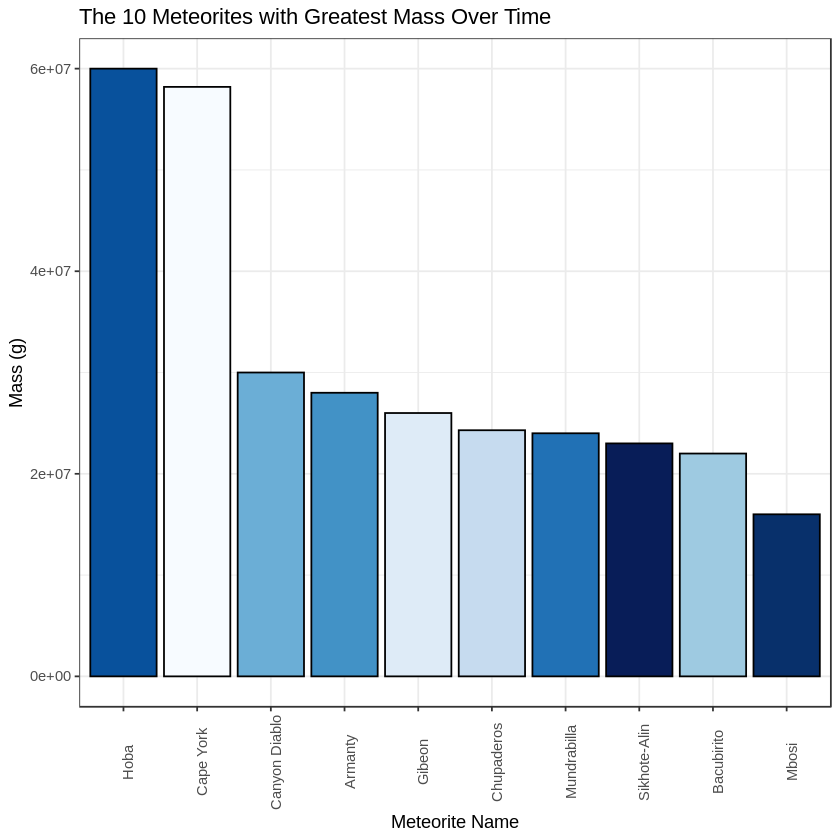

In [174]:
#Graph top meteorite mass data with color trends based on earliest --> latest sightings

mass_top_10 <- mass_top_10[0:10,]

ggplot(mass_top_10, aes(x=reorder(name, -mass),mass)) +
geom_bar(stat='identity', fill = c('#08519c', '#f7fbff', '#6baed6', '#4292c6', '#deebf7', '#c6dbef', '#2171b5', '#081d58', '#9ecae1', '#08306b') , colour='black') +
ylab("Mass (g)") + xlab("Meteorite Name") +
theme_bw() + ggtitle("The 10 Meteorites with Greatest Mass Over Time") +
theme(axis.text.x = element_text(angle=90))

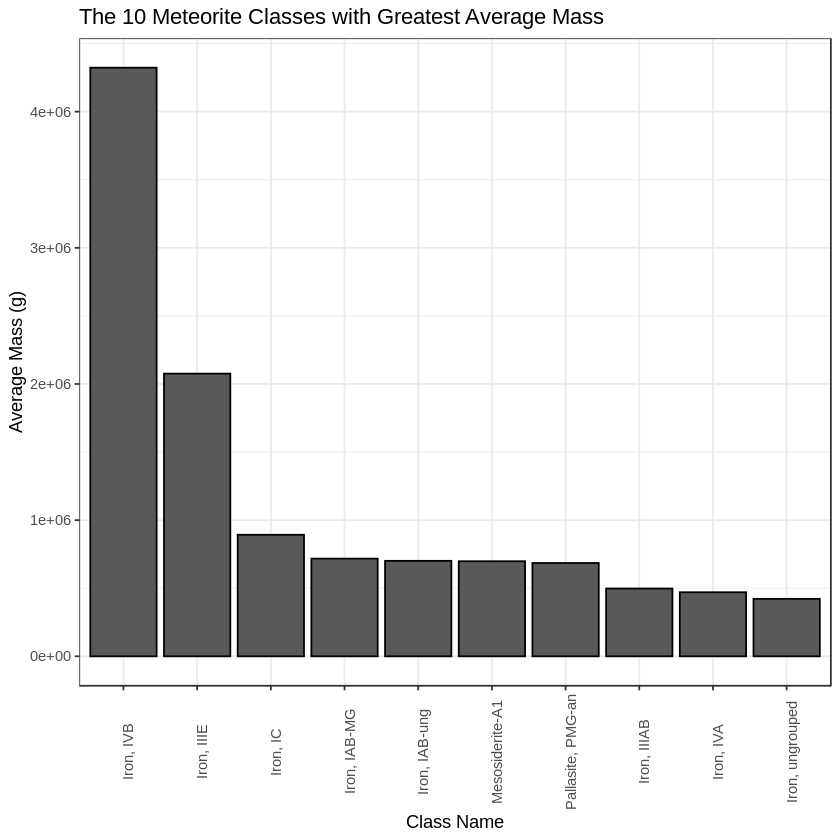

In [175]:
class_top_10 <- class_top_10[0:10,]

ggplot(class_top_10, aes(x=reorder(recclass, -ave_mass),ave_mass)) +
geom_bar(stat='identity', colour='black') +
ylab("Average Mass (g)") + xlab("Class Name") +
theme_bw() + ggtitle("The 10 Meteorite Classes with Greatest Average Mass") +
theme(axis.text.x = element_text(angle=90))

Warning message:
“Transformation introduced infinite values in continuous y-axis”

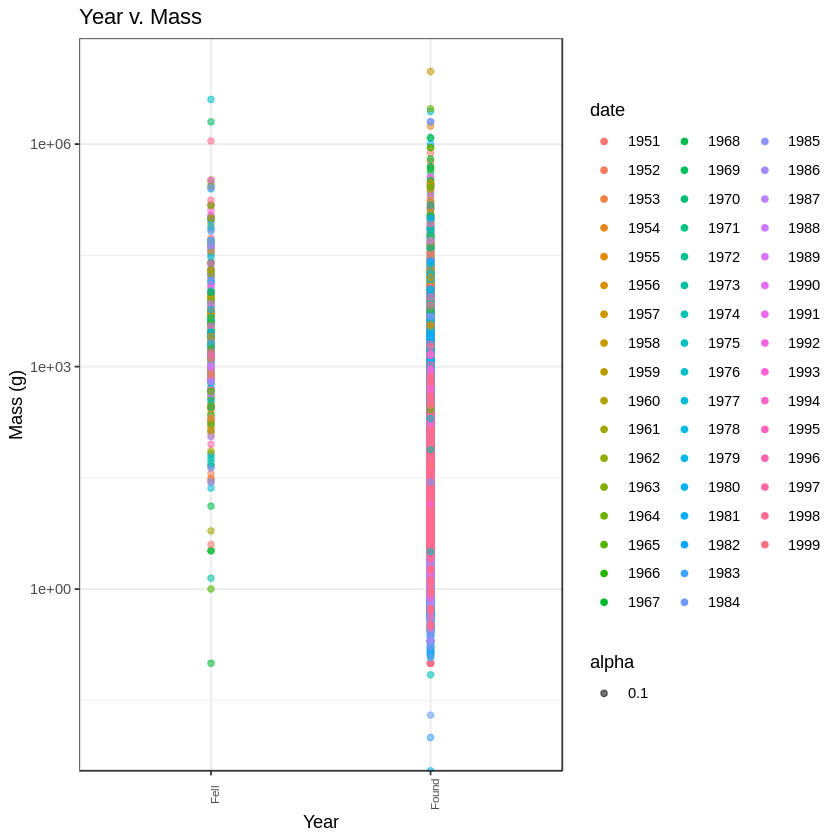

In [164]:
a <- myData %>%
filter(date > 1950 & date < 2000)

ggplot(a) + geom_point(aes(x=fall, y=mass..g., colour=date, alpha =0.1)) +
theme_bw() + xlab('Year') + ylab('Mass (g)') +
ggtitle("Year v. Mass") + scale_y_log10() +
theme(axis.text.x = element_text(angle=90, size=7))

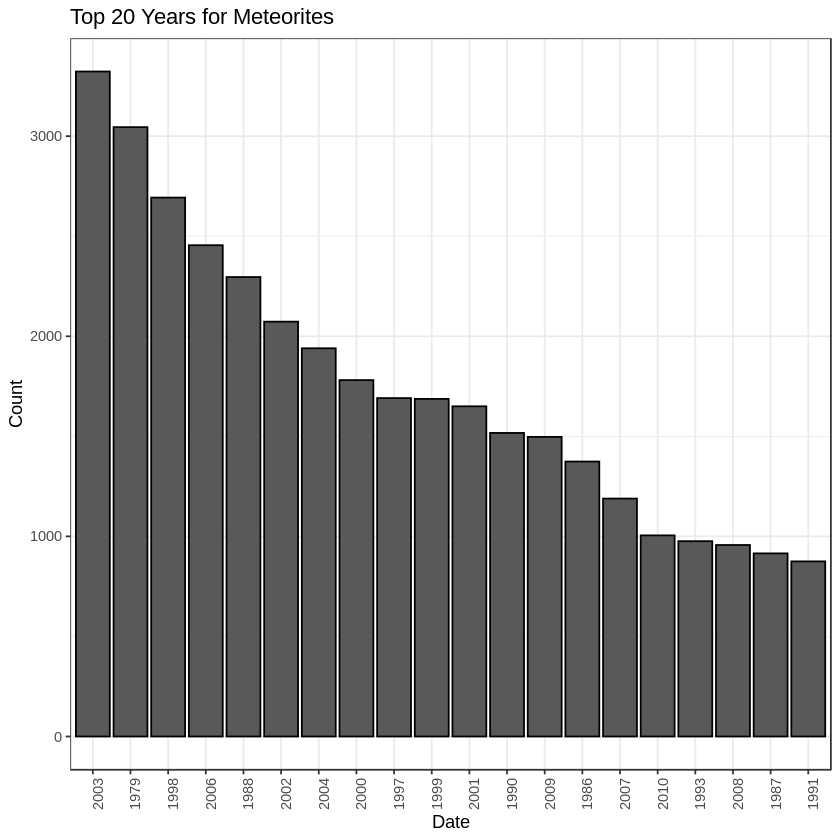

In [176]:
top_years <- top_years[0:20,]

ggplot(top_years, aes(x=reorder(date, -n),n)) + 
geom_bar(stat='identity', colour='black') +
ylab("Count") + xlab("Date") +
theme_bw() + ggtitle("Top 20 Years for Meteorites") +
theme(axis.text.x = element_text(angle=90))

## Conclusion: Tell the Story
In a few paragraphs, describe the story the data tells. 

Additionally, post your most compelling visual and provide a brief description of what it conveys on to our mutual aid channel. 

Feel free to post more examples for people to look at and give feedback about. Your classmates will be vital providers of feedback in this process. Utilize them.

# Save your notebook, then `File > Close and Halt`